In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data_type import povertyImprovment

Poverty Percentage Distribution

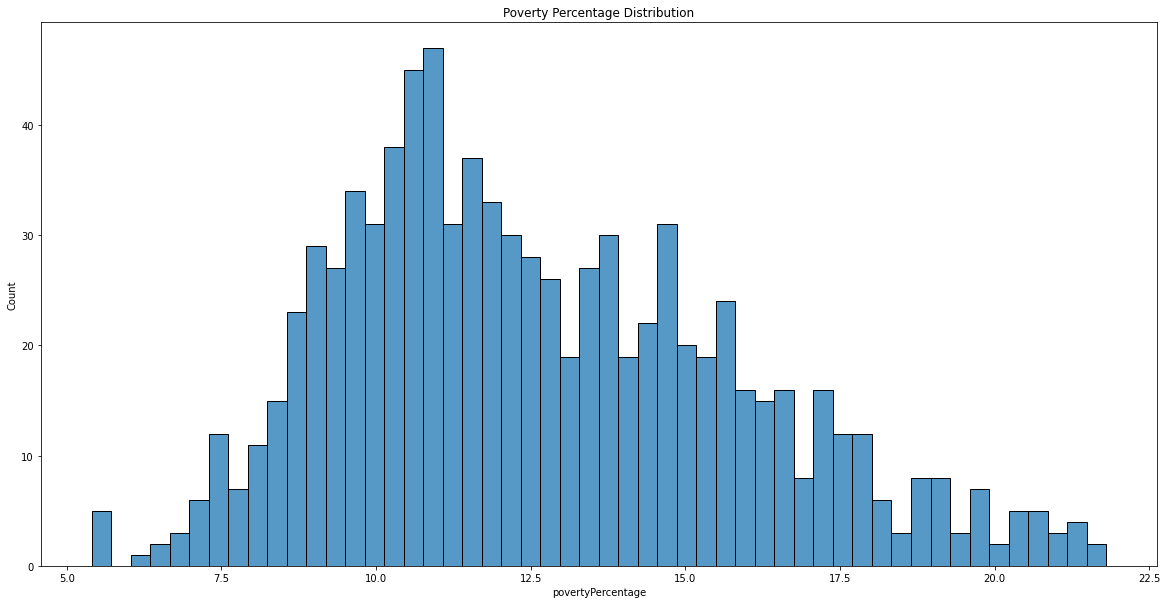

In [2]:
df = povertyImprovment()

plt.figure(figsize=(20, 10))
sns.histplot(x='povertyPercentage', bins=df.state.nunique(), data=df)
plt.title('Poverty Percentage Distribution')
plt.show()

Mean Poverty Percentage

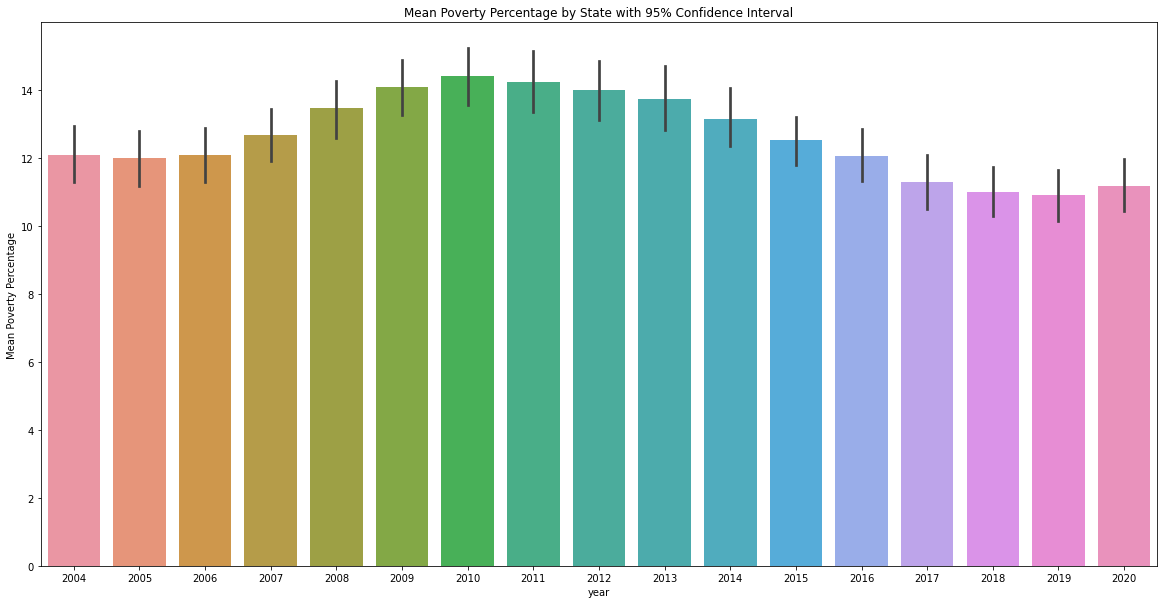

In [3]:
df = povertyImprovment()

plt.figure(figsize=(20, 10))
plt.title('Mean Poverty Percentage by State with 95% Confidence Interval')
sns.barplot(x = "year", y = "povertyPercentage", data = df, ci=95)
plt.ylabel('Mean Poverty Percentage')
plt.show()

Distribuzione per stato

Text(0.5, 0, 'Poverty Percentage')

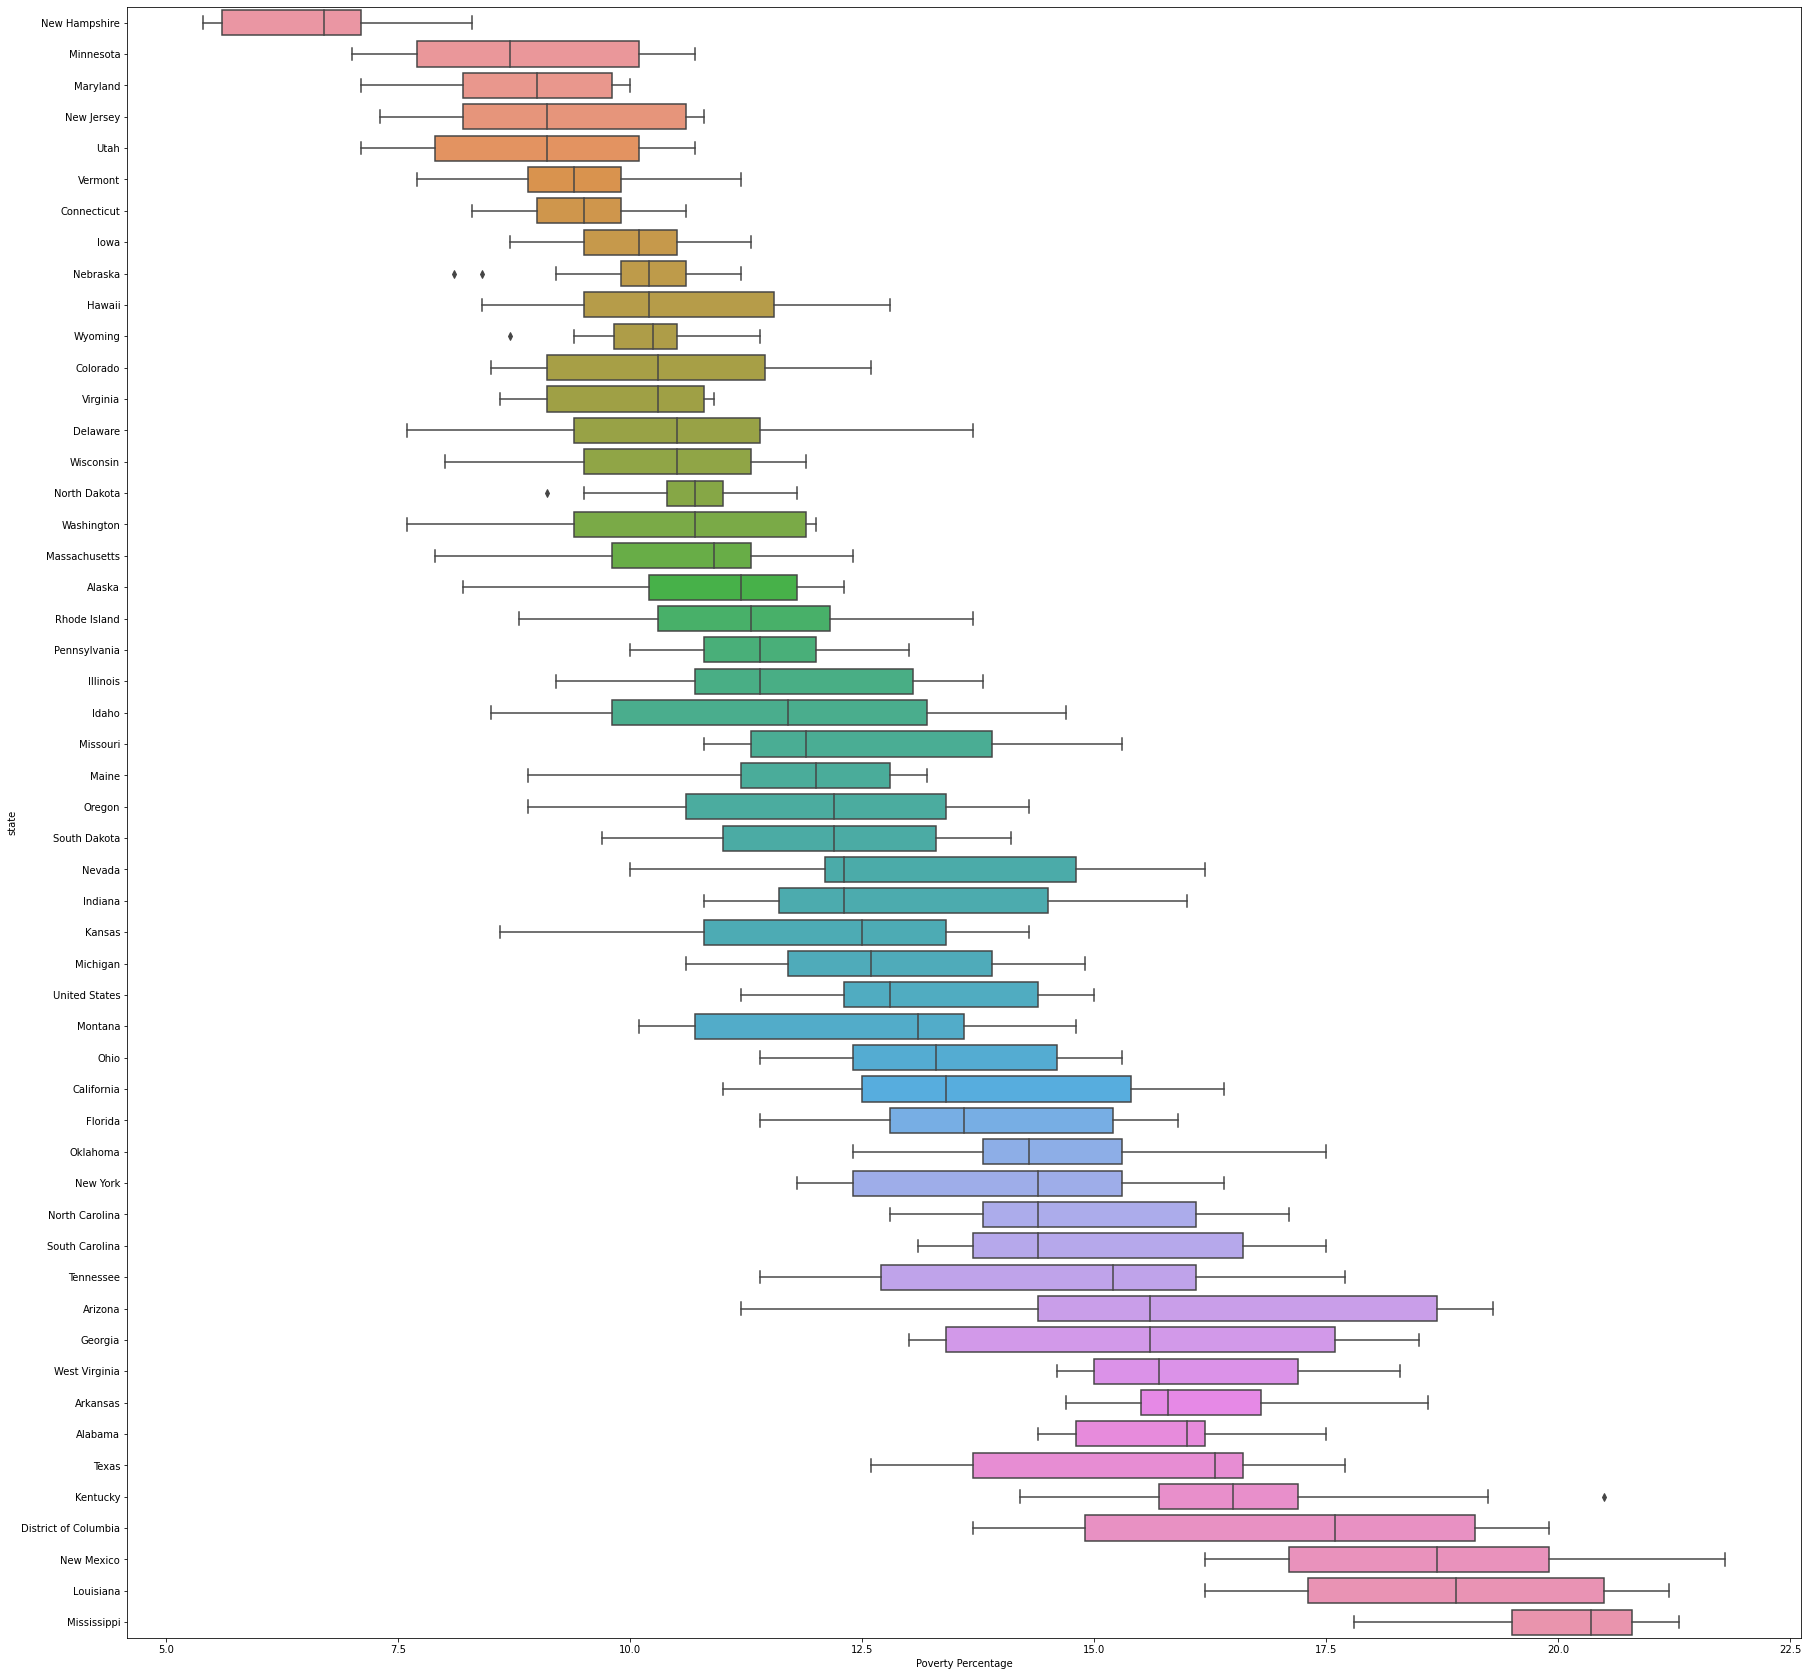

In [4]:
df = povertyImprovment()

# Calcola la mediana per ogni stato
medians = df.groupby(['state'])['povertyPercentage'].median().sort_values()

# Crea un boxplot ordinato in base alla mediana
plt.figure(figsize=(30, 30))
sns.boxplot(x=df['povertyPercentage'], y=df['state'], order=medians.index)
plt.xlabel('Poverty Percentage')